# News Mood

## Goal: 
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually. ur final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York Times.__

## Trends
1) The distribution of the data shows that some networks tweet more frequently than others, as well as highlighting that BBC tweets at times opposite than the US networks, likely because of the time change difference. 

2) All of the networks skew negative in terms of the average sentiment or their tweets, though not by much. 

3) I was expecting more tweets to fall on the (0) line, which is where most uncategorized tweets end up, but it looks like VADER was able to discern a majority of the tweets in their context, with the exception of the New York Times, which seems to nave far more 100% neutral sentiments than others. 

4) For fun, I ran the sentiment analysis without retweets, to see if that made a difference. Retweets only accounted for ~15% of tweets, so removing didn't make a large difference, though the results without retweets skewed slightly more negative sentament-wise. 

In [557]:
import tweepy
import numpy as np
import apikeys
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import time

In [558]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [559]:
consumer_key = apikeys.TWITTER_CONSUMER_KEY
consumer_secret = apikeys.TWITTER_CONSUMER_SECRET
access_token = apikeys.TWITTER_ACCESS_TOKEN
access_token_secret = apikeys.TWITTER_ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [560]:
# Target Search Term
target_users = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']
request_number=100
# Create an empty list to hold sentiments.
sentiments=[]
for user in target_users:
    public_tweets = api.user_timeline(screen_name=user, count=request_number)
    for tweet in public_tweets:
        # Get text of tweet
        text = tweet['text']
        date = pd.datetime.strptime(tweet["created_at"],'%a %b %d %H:%M:%S +0000 %Y')
        print(text)
        # Run Vader Analysis on each tweet
        scores = analyzer.polarity_scores(tweet['text'])
        compound = scores['compound']
        # Add dictionary of scores to the `sentiments` list
        sentiments.append({"Date": date, 
               "Compound": compound,
                          "Network": tweet['user']['name'],
                           "Twitter Handle": user,
                          "Text": text})


Tuesday’s Times: "Prosecute web giants for abuse, May urged" #bbcpapers #tomorrowspaperstoday (via @AllieHBNews) https://t.co/N99vgma3wN
Tuesday’s Guardian: "Grenfell: Call for families to be heard at last"  #bbcpapers #tomorrowspaperstoday (via… https://t.co/HlkOBCyysb
Tuesday’s Sun: "Twitter Is Playground For Paedos" #bbcpapers #tomorrowspaperstoday (via @AllieHBNews) https://t.co/hapQ3l4DfX
Tuesday’s Daily Telegraph: "Passengers denied cheap Christmas rail tickets" #bbcpapers #tomorrowspaperstoday (via… https://t.co/OwC5YfFp0Z
Tuesday’s City AM: "Ball’s In Your Court!" #bbcpapers #tomorrowspaperstoday (via @AllieHBNews) https://t.co/2PGRf8Us9a
Tuesday’s Metro: "President Trump 'Is A Pervert'" #bbcpapers #tomorrowspaperstoday (via @AllieHBNews) https://t.co/eCI7sPB5XU
Tuesday’s i: "The biggest breakthrough in brain science for 50 years" #bbcpapers #tomorrowspaperstoday (via… https://t.co/xvxgJifbdE
Tuesday’s Financial Times: "Europeans issue warning to Trump on tax overhaul" #bbcpape

RT @CBSEveningNews: The #CBSEveningNews starts in 10 minutes

@Jeffglor anchors live from Paris https://t.co/FhsnIusTgD
AHEAD: Hear what neighbors are saying about the New York City bombing suspect and what caught their attention befor… https://t.co/5mQphtaSJH
"I couldn't vote for Roy Moore. The state of Alabama deserves better," Richard Shelby says | Commentary: Why Shelby… https://t.co/mvWU6BWPQG
A family's toy review videos, starring their 6-year-old son, turned the youngster into one of the richest YouTube s… https://t.co/8QzLR3cpvh
A surreal sight: Dozens of manatees huddle together for warmth after overnight temperatures in this Florida town di… https://t.co/gh644YPyVw
.@CBSEveningNews anchor @jeffglor to interview French President Emmanuel Macron on Monday, Dec. 11. The interview w… https://t.co/XQPA7wktka
Shocking video shows a woman threatening to kill fellow passengers on a Southwest Airlines flight.… https://t.co/HpwGlWe0Jk
RT @CBSEveningNews: PREVIEW

@JeffGlor interviews F

He may no longer be in office, but former President Obama is still encouraging people to sign up for Obamacare as a… https://t.co/6HQOCTeBaB
Here's what really scares Donald Trump | Analysis by CNN's Chris Cillizza https://t.co/uNxpM4yvKZ https://t.co/FaGK8zLXf3
RT @KyungLahCNN: #ThomasFire sunset in Carpinteria. Smoke rising up is good news for firefighters. Wind shifting so SW flank is burning slo…
There's a shakeup happening at Soylent. A cofounder of the Silicon Valley startup is stepping down as CEO.… https://t.co/csbgdX6iWl
In conversations with authorities, the New York City bombing suspect pledged allegiance to ISIS, a law enforcement… https://t.co/CY6hvUtiic
RT @CNNSitRoom: President Trump backs Roy Moore with Alabama robocall: "Roy Moore is the guy we need to pass our 'Make America Great Again'…
The hotly contested race between Republican Roy Moore and Democrat Doug Jones will come to a close Tuesday when Ala… https://t.co/vbMf1qSjbT
The New Yorker has parted ways with its Wa

.@POTUS wants to see @NASA boots on the Moon https://t.co/HCcn30jrVp
Attorney General Jeff Sessions released a statement following the attack in New York City on Monday morning. In the… https://t.co/5C5PWVRcV8
.@POTUS: "Today's terror suspect entered our country through extended-family chain migration, which is incompatible… https://t.co/h39lTnpxNo
Pro-#Trump students in MAGA hats booted from 'safe space' campus coffee shop https://t.co/4jtE8Gk6rB
.@POTUS signed a policy directive Monday instructing the National Aeronautics and Space Administration to "refocus… https://t.co/z84aZUXZFL
EXCLUSIVE: Wife of demoted DOJ official worked for firm behind anti-Trump dossier https://t.co/62gpolRESS
'It Looks Pretty Good': Toomey Says Tax Bill Likely to Be Sent to Trump By Christmas https://t.co/9z3FO5KYpu
Gorka: Stop Looking at Your Cell Phone, Have a Plan in Case Terror Strikes https://t.co/p7whJkO00M
RT @FoxBusiness: Matt Lauer could lose $9M New Zealand ranch due to 'good character' clause ht

The New Yorker magazine fired Ryan Lizza, a high-profile political reporter, citing “improper sexual conduct” https://t.co/VdAlQseEFs
Amid a blur of TV ads and conflicting polls, Roy Moore and Doug Jones made their final appeals to voters in Alabama https://t.co/7NPj1HF4Sz
RT @sherifink: It was sobering to check figures and find out that only a little over half of Puerto Rico's pre-storm power grid load has be…
Excited about "The Crown"? Here's where to watch more movies and TV series about British history. https://t.co/bDlURur4jE
The 2018 Golden Globe nominations contained a slew of surprises and snubs https://t.co/ErpHROzZxf
These are the best. And the crispiest. Make them. You’ll be so happy. https://t.co/ifrBcIeix1
Breaking News: The New York bombing suspect told officials he was inspired by ISIS, and that he chose the subway be… https://t.co/toYDVuiQ7y
What role has free trade played in the world’s obesity epidemic? Mexico’s widening waistlines since Nafta may offer… https://t.co/

In [561]:
sentiments_df = pd.DataFrame(sentiments)        
            # Create a dataframe with sentiments
sentiments_df.to_csv('last100tweetsasof'+str(date.now())+'.csv')            # Get the average Sentiments
no_rt_df = sentiments_df.loc[~sentiments_df["Text"].str.startswith('RT')]

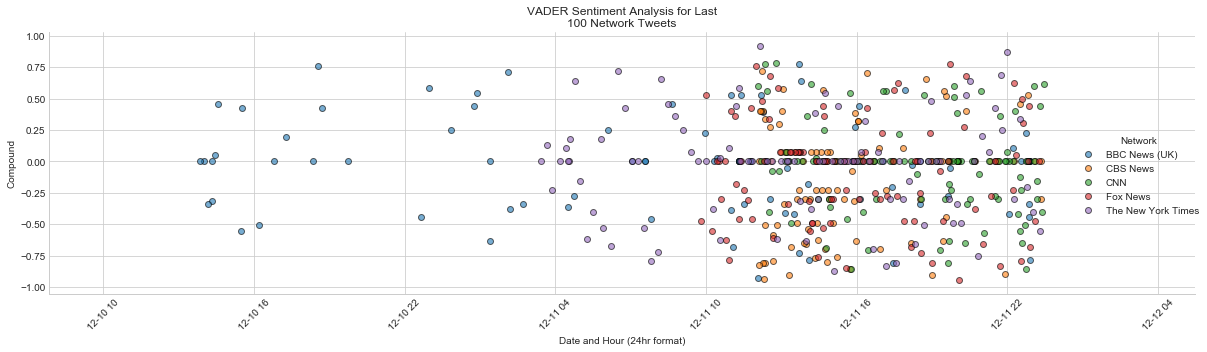

In [562]:
seaborn.set_style("whitegrid")
sns.FacetGrid(data=sentiments_df, hue='Network', size=5, aspect=3).map(plt.scatter, 'Date', 'Compound', alpha = 0.6, edgecolors='black').add_legend()
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)
plt.xlim(min(sentiments_df['Date'])-pd.Timedelta(days=.25, seconds=0), max(sentiments_df['Date'])+pd.Timedelta(days=.25, seconds=0))
plt.title("VADER Sentiment Analysis for Last\n100 Network Tweets")
plt.xlabel("Date and Hour (24hr format)")
plt.tight_layout()
plt.savefig('tweet_sentiment.png')
plt.show()


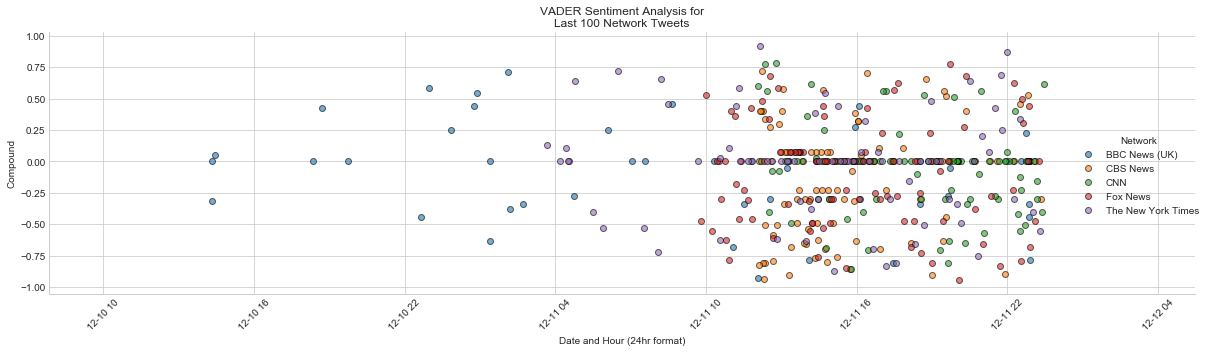

In [563]:
seaborn.set_style("whitegrid")
sns.FacetGrid(data=no_rt_df, hue='Network',size=5, aspect=3).map(plt.scatter, 'Date', 'Compound', alpha = 0.6, edgecolors='black').add_legend()
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)
plt.xlim(min(sentiments_df['Date'])-pd.Timedelta(days=.25, seconds=0), max(sentiments_df['Date'])+pd.Timedelta(days=.25, seconds=0))
plt.title("VADER Sentiment Analysis for\nLast 100 Network Tweets")
plt.xlabel("Date and Hour (24hr format)")
plt.tight_layout()
plt.savefig('no_RT_tweet_sentiment.png')
plt.show()


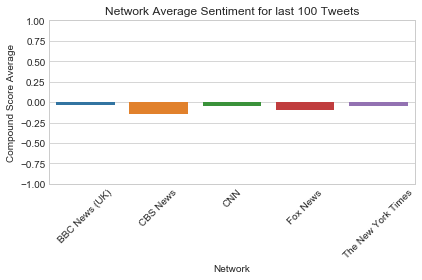

In [564]:
seaborn.set_style("whitegrid")
network_df=sentiments_df.groupby("Network").mean()
fg2=seaborn.barplot(x=network_df.index, y=network_df.Compound, data=network_df)
fg2.set(ylabel='Compound Score Average', xlabel='Network')
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)
plt.ylim(-1,1)
plt.title("Network Average Sentiment for last 100 Tweets")
plt.tight_layout()
plt.savefig('compound_network_sentiment.png')
plt.show()


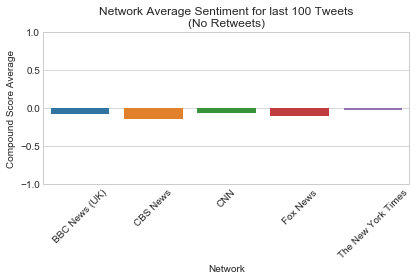

In [565]:
seaborn.set_style("whitegrid")
network_df=no_rt_df.groupby("Network").mean()
fg3=sns.barplot(x=network_df.index, y=network_df.Compound, data=network_df)
fg3.set(ylabel='Compound Score Average', xlabel='Network')
locs, labels = plt.xticks()
plt.setp(labels,rotation=45)
plt.ylim(-1,1)
plt.title("Network Average Sentiment for last 100 Tweets\n(No Retweets)")
plt.tight_layout()
plt.savefig('no_RT_compound_network_sentiment.png')
plt.show()
